In [ ]:
import pandas as pd

data = pd.read_csv('/content/sample_data/cardekho_dataset.csv')
data = data.drop("Unnamed: 0", axis = 1)
data

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [ ]:
# Import the libraries

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
# Data

data = pd.read_csv('/content/sample_data/cardekho_dataset.csv')
data = data.drop("Unnamed: 0", axis = 1)
data

In [ ]:
# Understanding the data
data.head()
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [ ]:
# lets create numerical and categorical features

numerical_features = [i for i in data.columns if data[i].dtype != 'O']

categorical_features = [i for i in data.columns if data[i].dtype == 'O']


categorical_features

['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

In [ ]:
data.describe(include = 'object') # Categorical
data.describe() # Numerical

,car_name,brand,model,seller_type,fuel_type,transmission_type
count,15411,15411,15411,15411,15411,15411
unique,121,32,120,3,5,2
top,Hyundai i20,Maruti,i20,Dealer,Petrol,Manual
freq,906,4992,906,9539,7643,12225


In [ ]:
# Data cleaning

Data is already clean

In [ ]:
# Checking for duplicates

data.drop_duplicates(inplace = True)
data.shape

(15244, 13)

/tmp/ipython-input-1480269367.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = data[numerical_features[i]], shade = True)
/tmp/ipython-input-1480269367.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = data[numerical_features[i]], shade = True)
/tmp/ipython-input-1480269367.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = data[numerical_features[i]], shade = True)
/tmp/ipython-input-1480269367.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = data[numerical_features[i]], sh

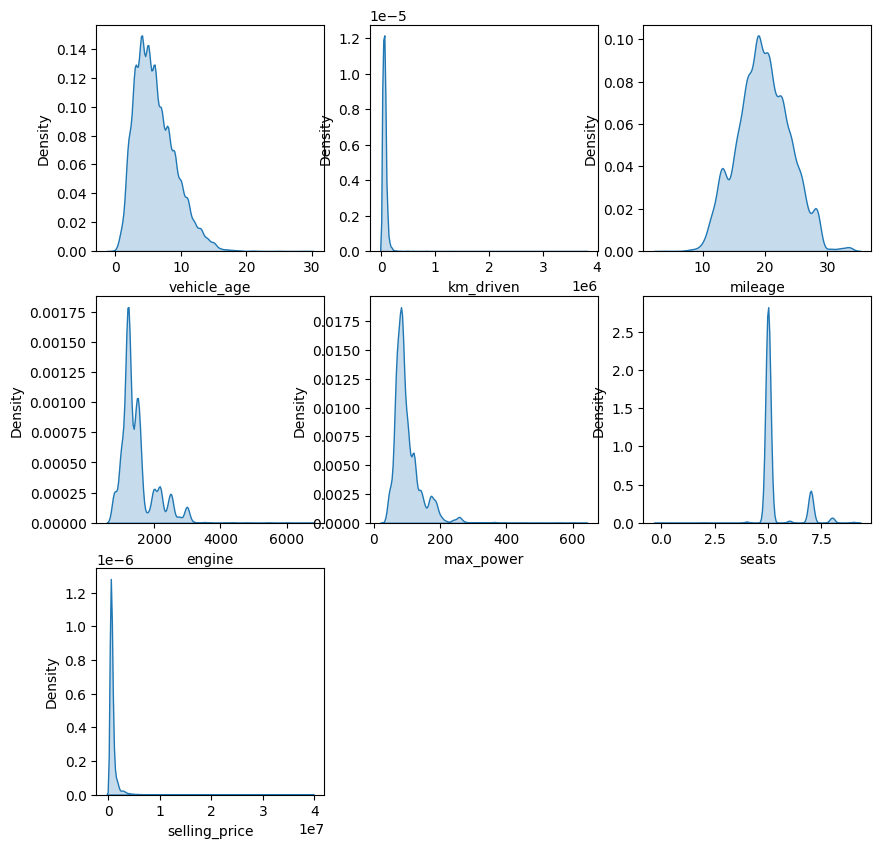

In [ ]:
# EDA  (Numerical columns)

# 1. Univariate analysis (Numerical columns)

plt.figure(figsize = (10,10))
for i in range(0, len(numerical_features)):
  plt.subplot(3,3,i+1)
  sns.kdeplot(x = data[numerical_features[i]], shade = True)


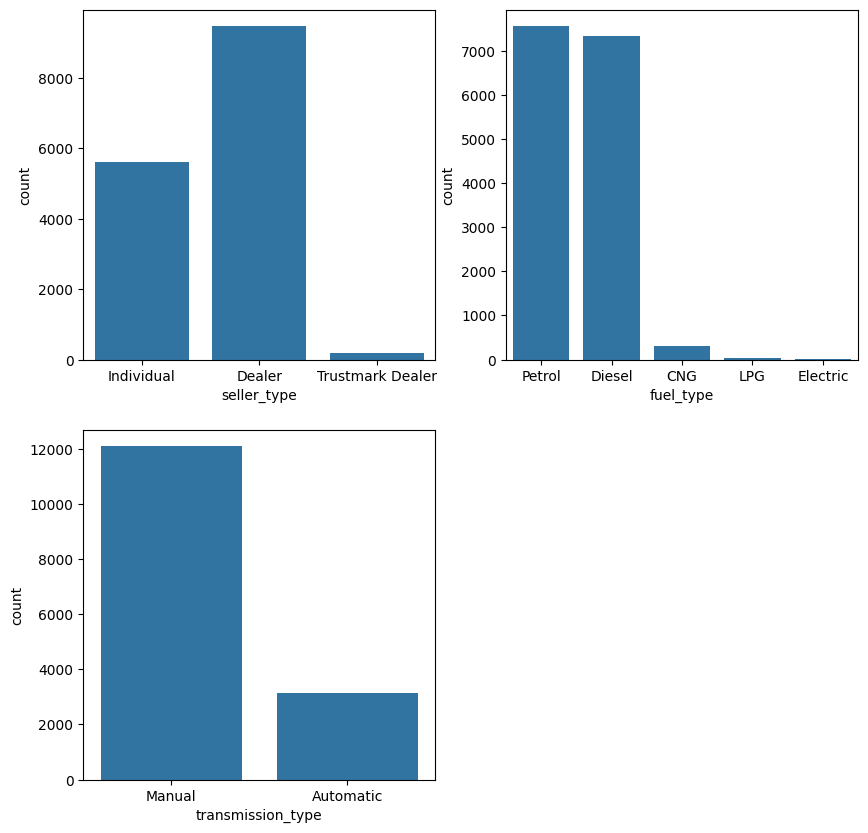

In [ ]:
# 1. Univariate analysis (Categorical columns)

plt.figure(figsize = (10,10))

cat_columns = ['seller_type', 'fuel_type', 'transmission_type']

for i in range(0, len(cat_columns)):
  plt.subplot(2,2,i+1)
  sns.countplot(x = data[cat_columns[i]])


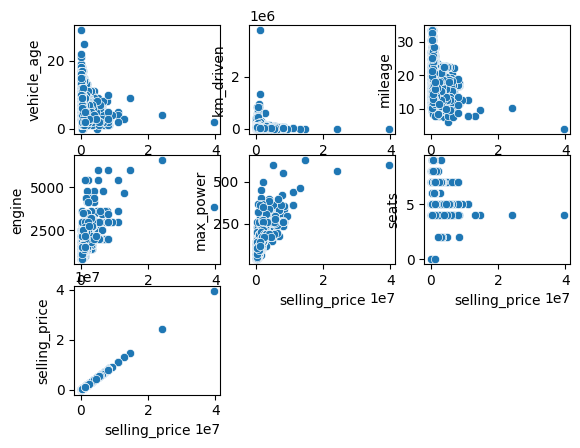

In [ ]:
# Bivariate analysis (Numerical features)
# Relationship of target variable with each of the independent variables

for i in range(0, len(numerical_features)):
  plt.subplot(3,3,i+1)
  sns.scatterplot(data = data, x = 'selling_price', y= numerical_features[i])

In [ ]:
# Multivariate analysis

data[numerical_features].corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.332725,-0.257599,0.098734,0.004356,0.030268,-0.241228
km_driven,0.332725,1.000000,-0.104979,0.192721,0.044776,0.192026,-0.079548
mileage,-0.257599,-0.104979,1.000000,-0.632161,-0.532172,-0.439943,-0.305128
engine,0.098734,0.192721,-0.632161,1.000000,0.807287,0.551401,0.585713
max_power,0.004356,0.044776,-0.532172,0.807287,1.000000,0.172264,0.751058
seats,0.030268,0.192026,-0.439943,0.551401,0.172264,1.000000,0.115299
selling_price,-0.241228,-0.079548,-0.305128,0.585713,0.751058,0.115299,1.000000


<Axes: >

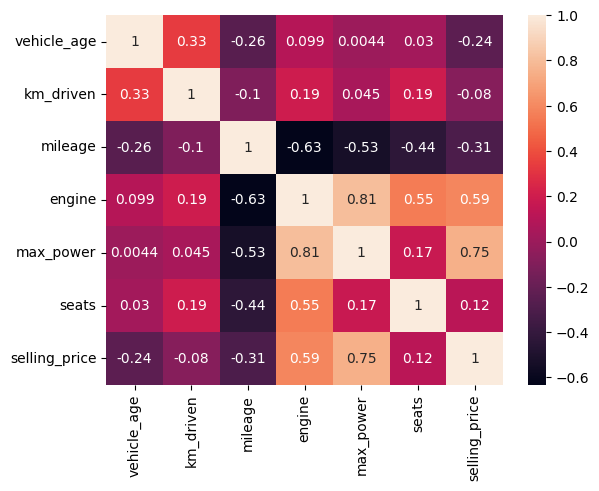

In [ ]:
sns.heatmap(data = data[numerical_features].corr(), annot = True)


In [ ]:
Basic Data Analysis

# Finding the most sold car
# Which car has the highest mileage, Power, Engine

In [ ]:
# Feature Engineering

1. Removing unnecessary columns
2. Converting some categorical columns into numerical (One hot encoding)

In [ ]:
model_data = data.copy()

# Removed unecessary columns
model_data.drop(['car_name', 'brand', 'model'], axis = 1, inplace = True)

model_data


,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...
15406,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [ ]:
# Converting categorical columns to numerical

model_data = pd.get_dummies(model_data, dtype = int)

model_data

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,120000,0,1,0,0,0,0,0,1,0,1
1,5,20000,18.90,1197,82.00,5,550000,0,1,0,0,0,0,0,1,0,1
2,11,60000,17.00,1197,80.00,5,215000,0,1,0,0,0,0,0,1,0,1
3,9,37000,20.92,998,67.10,5,226000,0,1,0,0,0,0,0,1,0,1
4,6,30000,22.77,1498,98.59,5,570000,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,9,10723,19.81,1086,68.05,5,250000,1,0,0,0,0,0,0,1,0,1
15407,2,18000,17.50,1373,91.10,7,925000,1,0,0,0,0,0,0,1,0,1
15408,6,67000,21.14,1498,103.52,5,425000,1,0,0,0,1,0,0,0,0,1
15409,5,3800000,16.00,2179,140.00,7,1225000,1,0,0,0,1,0,0,0,0,1


In [ ]:
# Dividing x and y variables

x = model_data.drop('selling_price', axis = 1)

y = model_data['selling_price']

y

,selling_price
0,120000
1,550000
2,215000
3,226000
4,570000
...,...
15406,250000
15407,925000
15408,425000
15409,1225000


In [ ]:
# Train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)


,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual,predicted_price,Actual_price
454,16,33650,18.90,998,67.10,5,0,1,0,0,0,0,0,1,0,1,675000.0,110000
10830,7,100000,15.40,1997,120.00,7,1,0,0,0,1,0,0,0,0,1,425000.0,825000
13098,2,2200,18.10,1199,88.70,5,1,0,0,0,0,0,0,1,1,0,525000.0,790000
8017,6,113000,19.64,1461,108.45,5,0,1,0,0,1,0,0,0,0,1,940000.0,500000
9646,7,70000,22.54,1396,88.76,5,1,0,0,0,1,0,0,0,0,1,650000.0,340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13818,2,4300,21.40,1197,83.10,5,1,0,0,0,0,0,0,1,1,0,650000.0,790000
6224,3,33000,21.01,1197,81.80,5,1,0,0,0,0,0,0,1,0,1,275000.0,730000
11393,9,85000,12.80,2953,156.00,7,1,0,0,0,1,0,0,0,1,0,525000.0,645000
636,5,30000,22.54,1396,88.73,5,0,1,0,0,1,0,0,0,0,1,340000.0,820000


In [ ]:
#Scaling

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)


In [ ]:
# Model building libraries

from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


In [ ]:
models = [LinearRegression,SVR,RandomForestRegressor,DecisionTreeRegressor]
r2_value = []

for model in models:
  regressor = model().fit(x_train, y_train)
  pred = regressor.predict(x_test)
  r2 = r2_score(y_true = y_test, y_pred = pred)
  r2_value.append(r2)

print(r2_value)


[0.6817695149040273, -0.07851925872034182, 0.9301957763339955, 0.860931359515243]


array([675000., 425000., 525000., ..., 525000., 340000., 425000.])

In [ ]:
Evaluation = pd.DataFrame({'Model' : ['LinearRegression','SVR','RandomForestRegressor','DecisionTreeRegressor'],
              "R-square_values": r2_value})

Evaluation

,Model,R-square_values
0,LinearRegression,0.681770
1,SVR,-0.078519
2,RandomForestRegressor,0.930556
3,DecisionTreeRegressor,0.880606


In [ ]:
x_test

array([[-0.67444223, -0.62174979,  1.81619966, ..., -0.99566336,
        -0.50920888,  0.50920888],
       [ 0.64670836,  0.28073323, -0.16717877, ..., -0.99566336,
        -0.50920888,  0.50920888],
       [ 1.6375713 ,  0.04592276, -1.83638239, ..., -0.99566336,
        -0.50920888,  0.50920888],
       ...,
       [-0.01386694,  0.17134191,  0.16618229, ...,  1.00435553,
        -0.50920888,  0.50920888],
       [ 0.64670836,  1.2203809 ,  1.19744314, ..., -0.99566336,
        -0.50920888,  0.50920888],
       [ 0.976996  ,  0.48488979,  1.65071826, ..., -0.99566336,
        -0.50920888,  0.50920888]])